In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import warnings
import re
import nltk
from nltk.corpus import stopwords

warnings.filterwarnings("ignore")
%matplotlib inline

***Reading the Gene and Variation Data***

In [2]:
data = pd.read_csv('data/training_variants')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [9]:
print(f"Number of data points: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print(f"Features: {data.columns.values}")
data.head()

Number of data points: 3321
Number of features: 4
Features: ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


***Reading Text Data***

In [11]:
data_text = pd.read_csv("data/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [12]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   TEXT    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [13]:
print(f"Number of data points: {data_text.shape[0]}")
print(f"Number of features: {data_text.shape[1]}")
print(f"Features: {data_text.columns.values}")
data_text.head()

Number of data points: 3321
Number of features: 2
Features: ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### Preprocessing the Text

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AMAN
[nltk_data]     OSSAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# loading the stopwords
stop_words = set(stopwords.words('english'))

In [21]:
print(stop_words)

{"mightn't", 'other', 'into', 'aren', 'only', 'nor', 'what', 'have', 'in', "you're", 'off', 'who', 'i', 'o', 'itself', 'an', 'll', 'my', 'she', "wouldn't", 'then', 'should', 'shouldn', 'yourselves', 'as', 'having', 'over', 'because', 'can', 'they', 'you', 'was', "that'll", 'doing', 'theirs', 'her', 'does', 'our', 'haven', "couldn't", 'at', 'are', 'against', 'all', 'he', "isn't", 's', 'won', 'from', 'your', 'when', 're', 'about', 'again', 'am', 'so', 'were', 'don', 'once', 'has', 'these', "shouldn't", 'or', 'the', 'no', "don't", 'which', 'same', 'm', 'be', 'hers', 'isn', 'needn', 'how', 'being', "aren't", 'now', "won't", 'yours', 've', 'their', 'those', 'below', 'where', "hadn't", 'more', 'been', "wasn't", 'if', 't', "hasn't", 'up', 'not', 'each', 'both', 'will', 'down', 'themselves', 'for', 'its', 'had', 'did', 'on', 'ain', 'y', 'than', 'such', 'herself', 'with', 'him', "she's", "haven't", 'ma', 'by', 'himself', "you've", 'd', 'it', "weren't", 'above', 'too', 'further', "you'd", 'could

In [24]:
# preprocessing function
def nlp_preprocess(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replacing special characters with empty space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+', ' ', total_text)
        # converting to lower case
        total_text = total_text.lower()
        
        # removing stop words from the text
        for word in total_text.split():
            if not word in stop_words:
                string += word + ' '
        data_text[column][index] = string

In [29]:
# preprocessing the text:
start_time = time.perf_counter()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocess(row['TEXT'], index, 'TEXT')
    else:
        print("No text found at index:", index)
end_time = time.perf_counter()

print(f"Total time for preprocessing text = {end_time - start_time} seconds")

No text found at index: 1109
No text found at index: 1277
No text found at index: 1407
No text found at index: 1639
No text found at index: 2755
Total time for preprocessing text = 40.28371576099971 seconds


In [31]:
# merging the text and the variants 
result = pd.merge(data, data_text, on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


***Finding Null values in the TEXT***

In [35]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


- We have 5 data points which do not have the TEXT.
- We will impute the missing values as `'Gene' + ' ' + 'Variation'`

In [40]:
result.loc[result['TEXT'].isnull(), 'TEXT'] = result['Gene'] + ' ' + result['Variation']

In [41]:
# checking the imputed values
result.iloc[[1109, 1277, 1407, 1639, 2755]]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F
1277,1277,ARID5B,Truncating Mutations,1,ARID5B Truncating Mutations
1407,1407,FGFR3,K508M,6,FGFR3 K508M
1639,1639,FLT1,Amplification,6,FLT1 Amplification
2755,2755,BRAF,G596C,7,BRAF G596C


In [43]:
result['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

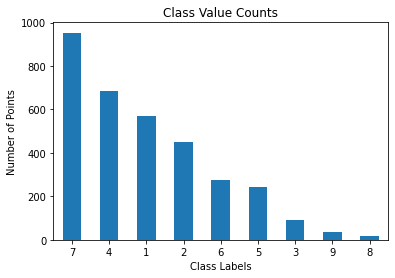

In [54]:
plt.figure()
result['Class'].value_counts().plot(kind='bar')
plt.title('Class Value Counts')
plt.xlabel('Class Labels')
plt.ylabel('Number of Points')
plt.xticks(rotation='horizontal')
plt.show();

In [60]:
# saving the result DataFrame to the 'data' directory
result.to_csv("data/train_data.csv", index=False)